# KMP & Heap
https://contest.yandex.ru/contest/43711/problems/

## EyeQueue-Priority

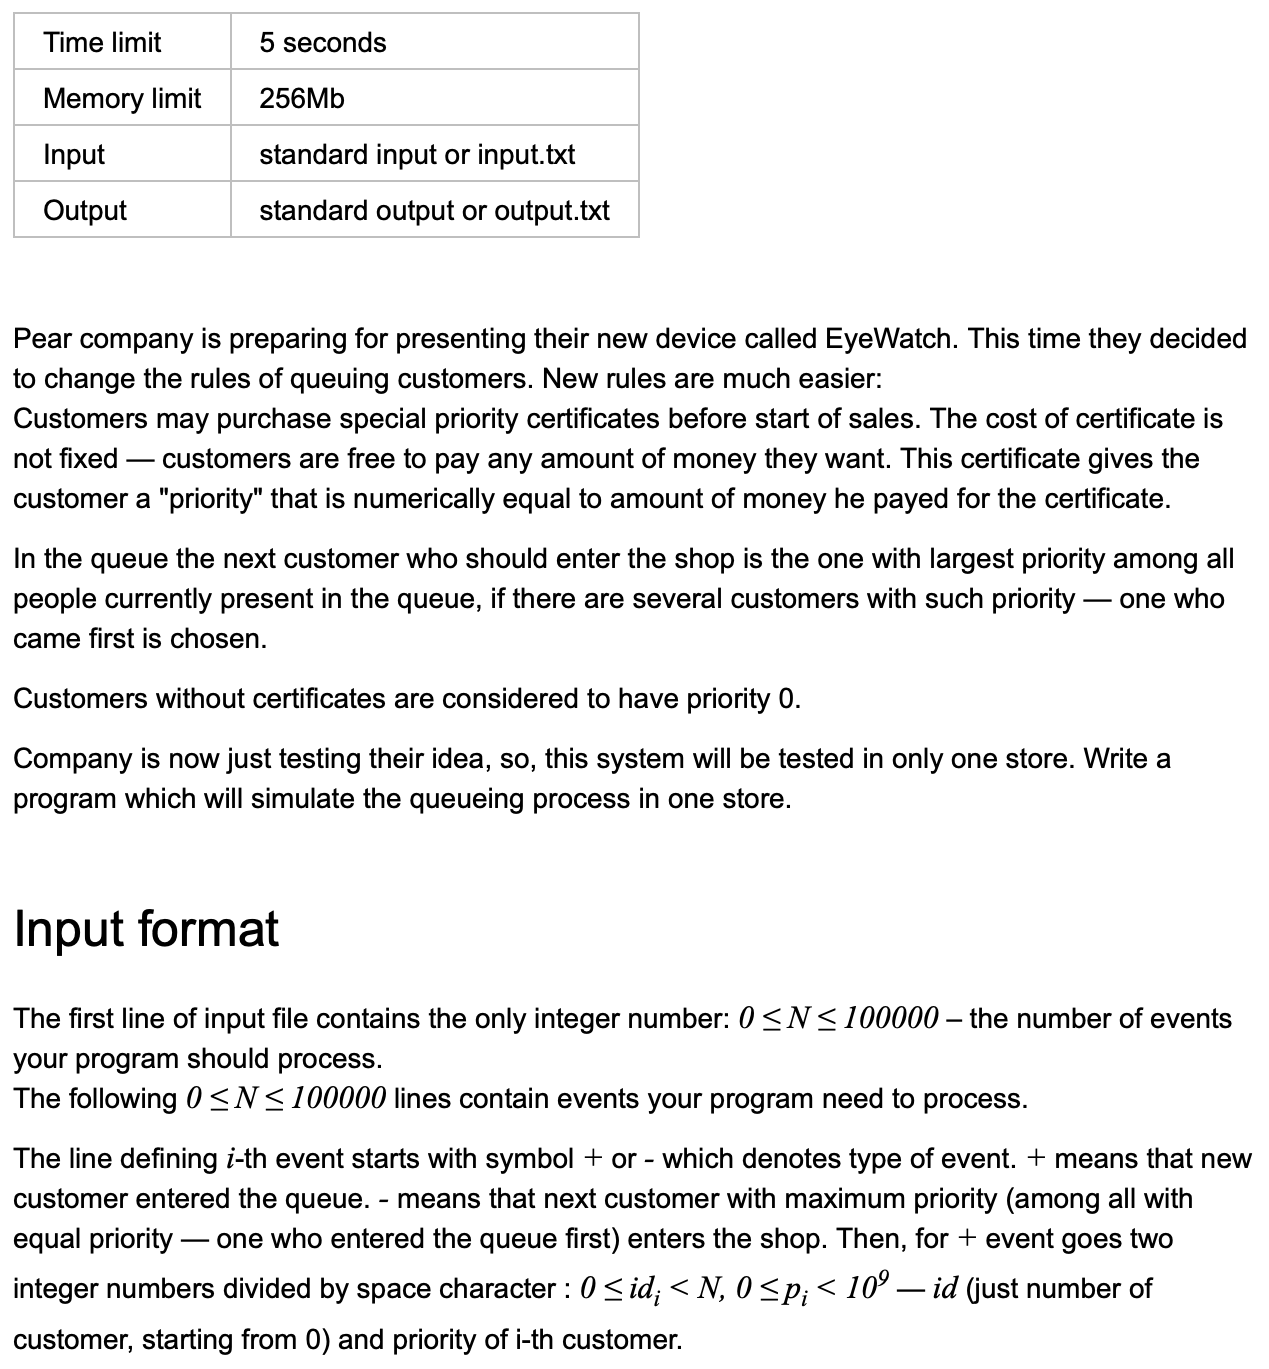

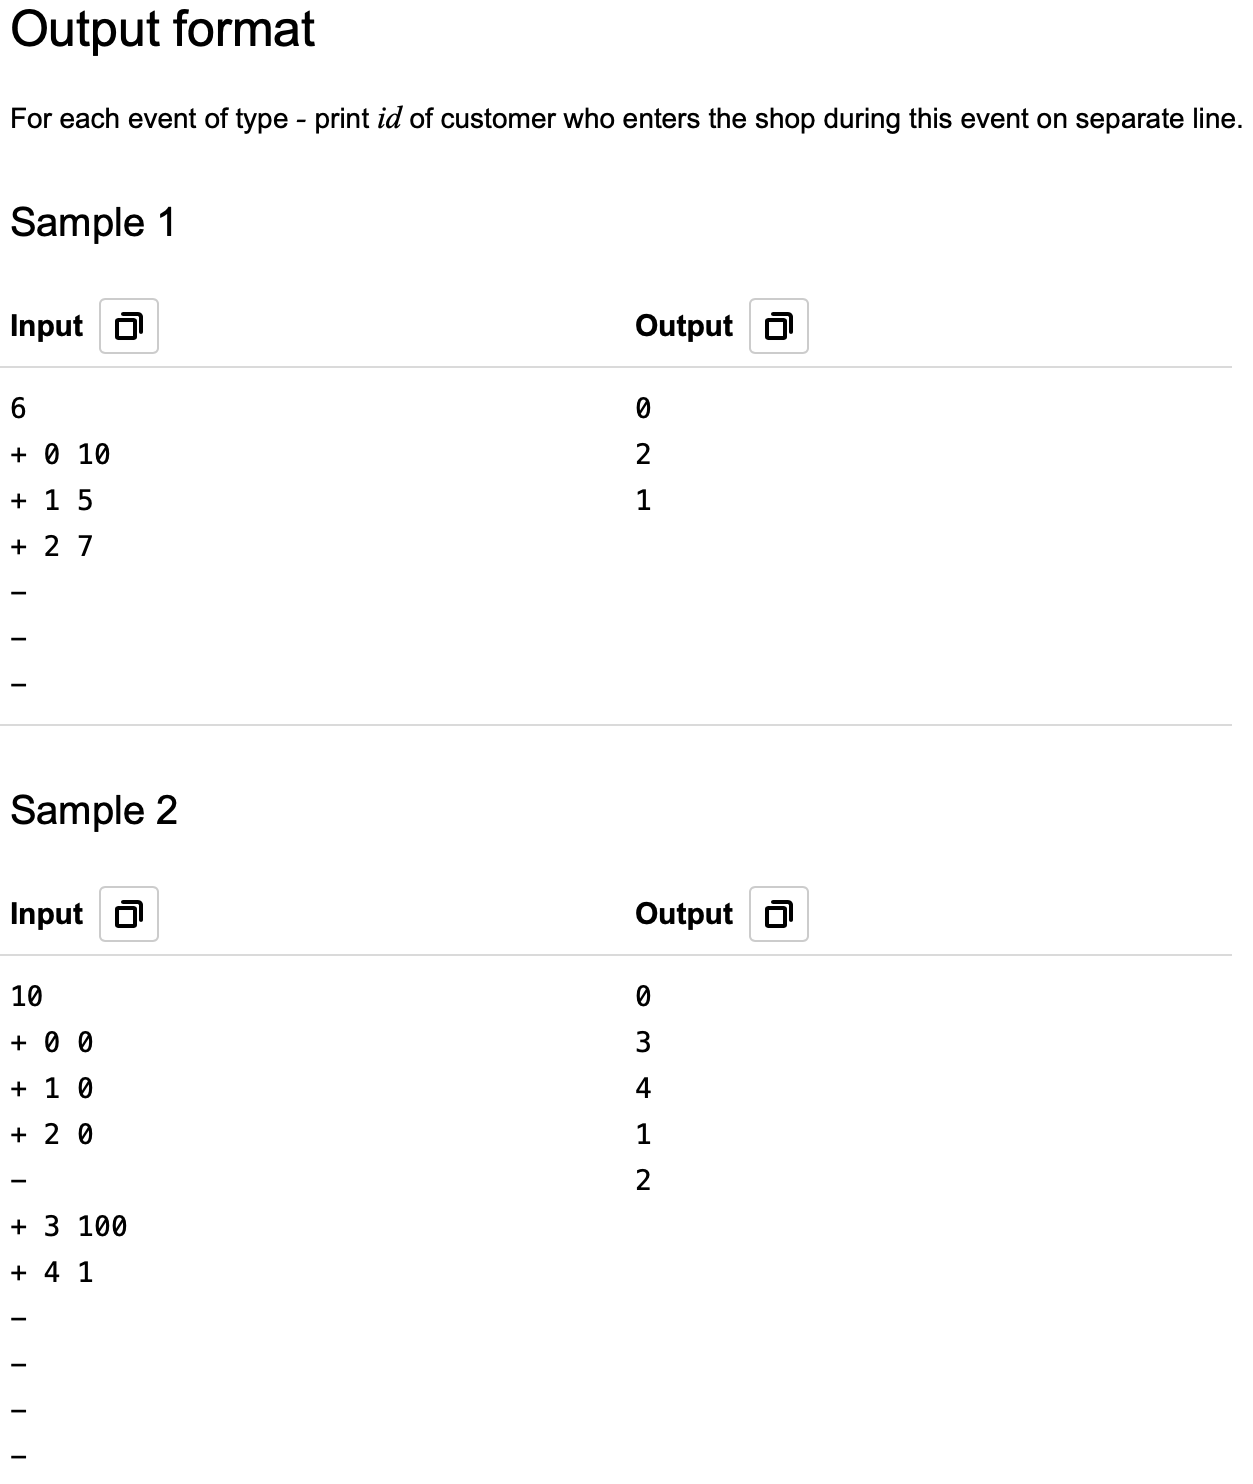

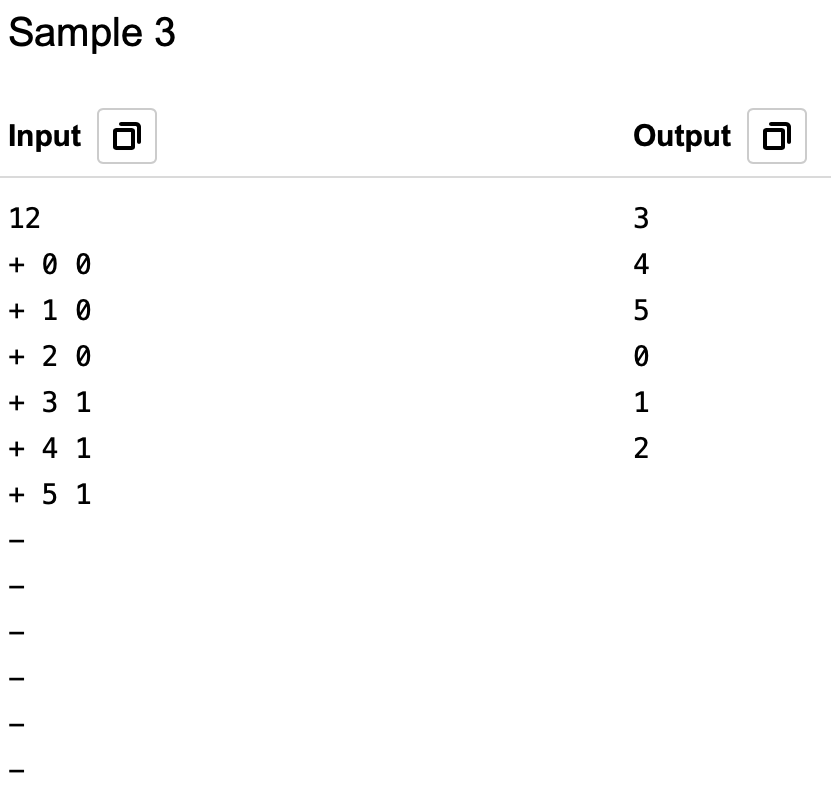

In [ ]:
class max_bin_heap:

    def __init__(self):
        self.tree = []

    def parent(self, pos):
        return (pos - 1) // 2

    def leftChild(self, pos):
        return 2 * pos + 1

    def rightChild(self, pos):
        return (2 * pos) + 2

    def swap(self, pos1, pos2):
        self.tree[pos1], self.tree[pos2] = self.tree[pos2], self.tree[pos1]

    def add(self, value):
        self.tree.append(value)
        pos = len(self.tree) - 1
        parent_pos = self.parent(pos)
        parent = self.tree[parent_pos]
        while value > parent and pos != 0:
            self.swap(pos, parent_pos)
            pos = parent_pos
            parent_pos = self.parent(pos)
            parent = self.tree[parent_pos]

    def show(self):
        print(self.tree)

    def delete(self):

        res = self.tree[0]
        if len(self.tree) == 1:
            self.tree = []
            return res

        value = self.tree[-1]
        pos = 0
        self.tree[pos] = value
        self.tree.pop(-1)

        if len(self.tree) == 1:
            return res
        elif len(self.tree) == 2:
            if self.tree[1] > self.tree[0]:
                self.tree[0], self.tree[1] = self.tree[1], self.tree[0]
            return res

        left_child_pos = 1
        left_child = self.tree[left_child_pos]
        right_child_pos = 2
        right_child = self.tree[right_child_pos]
        while value < left_child or value < right_child:

            if left_child < right_child:
                max_child = right_child
                max_child_pos = right_child_pos
            else:
                max_child = left_child
                max_child_pos = left_child_pos

            self.swap(pos, max_child_pos)
            pos = max_child_pos

            left_child_pos = self.leftChild(pos)
            right_child_pos = self.rightChild(pos)

            if left_child_pos >= len(self.tree):
                left_child = (-1, 0)
            else:
                left_child = self.tree[left_child_pos]

            if right_child_pos >= len(self.tree):
                right_child = (-1, 0)
            else:
                right_child = self.tree[right_child_pos]

        return res


n = int(input())

if n != 0:
    first_command = input().split()
    ind = int(first_command[1])
    val = int(first_command[2])
    tree = max_bin_heap()
    tree.add((val, -ind))


for i in range(1, n):
    command = input().split()
    if command[0] == '+':
        ind = int(command[1])
        val = int(command[2])
        tree.add((val, -ind))

    elif command[0] == '-':
        res = tree.delete()
        print(-res[1])


## Circular Shift

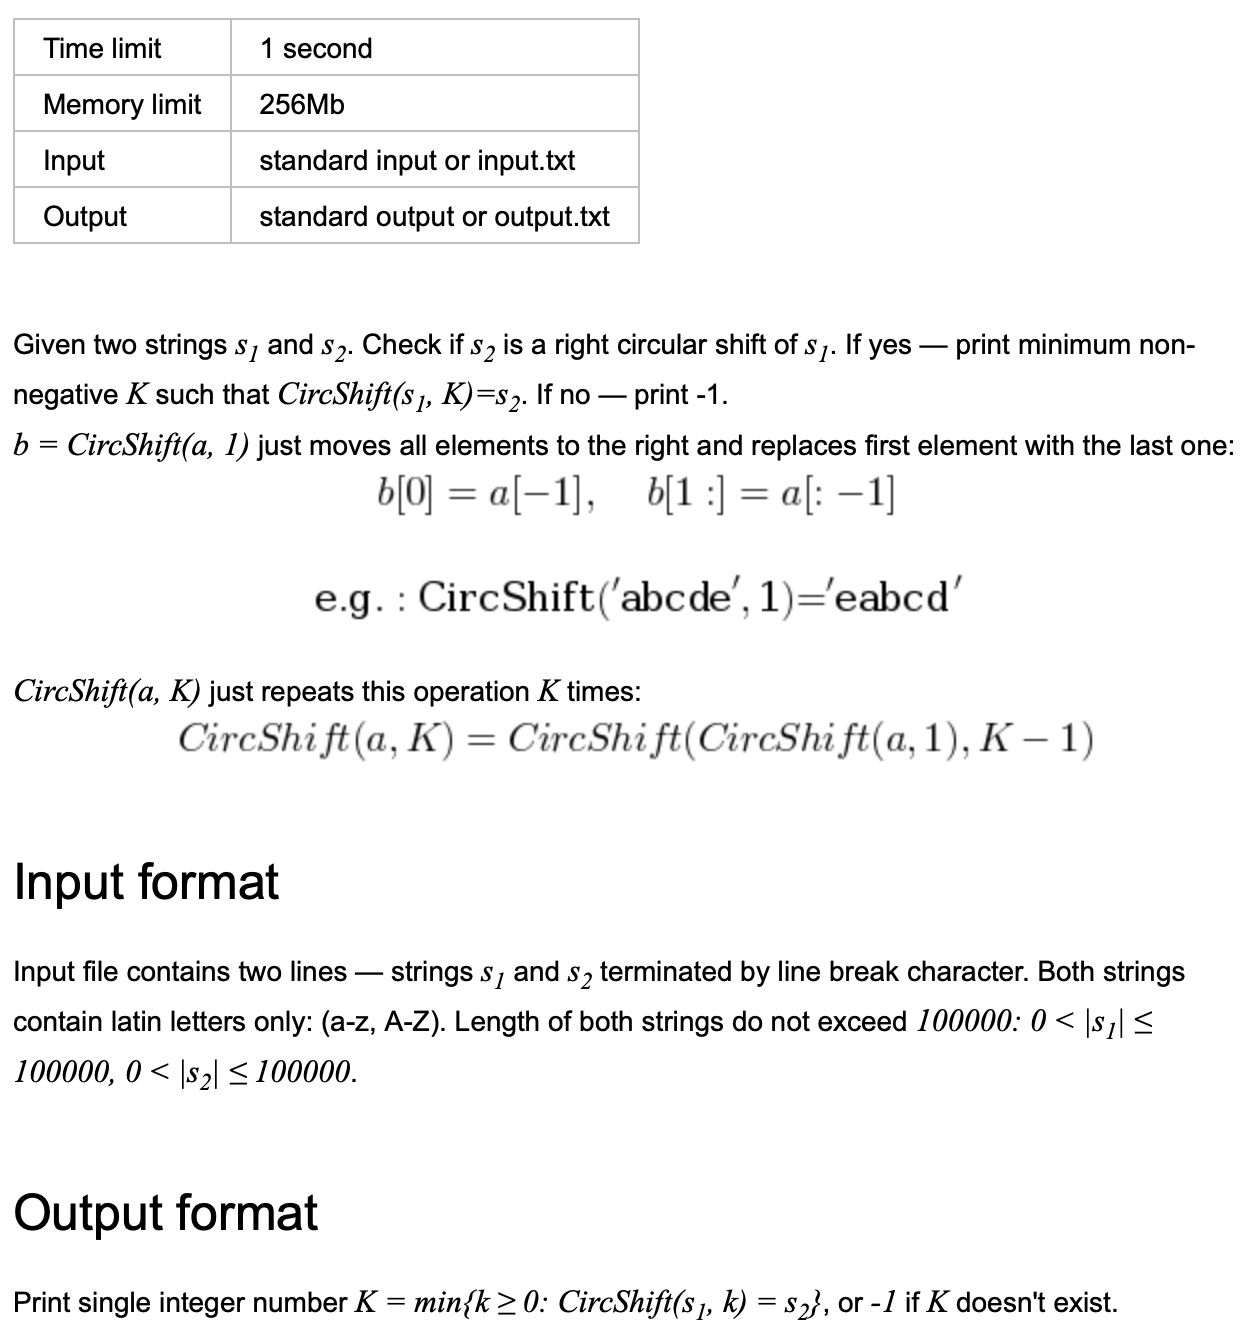

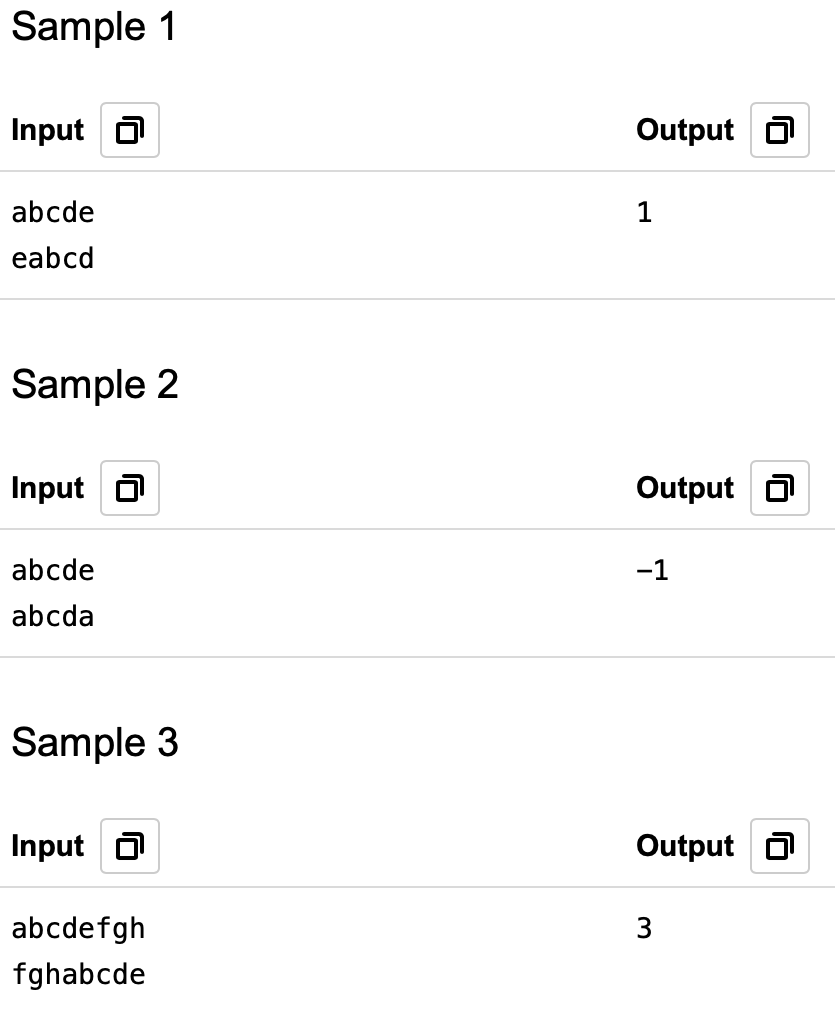

In [ ]:
def knp_alg(string):
    pref_func = [0] * (len(string) + 1)
    for i in range(2, len(pref_func)):
        pref_func[i] = pref_func[i - 1]
        while string[i - 1] != string[pref_func[i]] and pref_func[i] > 0:
            pref_func[i] = pref_func[pref_func[i]]
        if string[i - 1] == string[pref_func[i]]:
            pref_func[i] += 1
    return pref_func


def find_right_circular_shift(s, p):
    if len(s) != len(p) or set(s) != set(p):
        return -1
    if s == p:
        return 0
    string = p + s
    rep = knp_alg(string)[-1]
    mid = len(s)
    if string[rep:mid] == string[mid:len(string) - rep]:
        return rep
    else:
        return -1


s = input()
p = input()
print(find_right_circular_shift(s, p))
